Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Drew Phillips"
COLLABORATORS = ""

---

<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education

# Week 6 Homework Template

To complete assignment 6, be sure you have reviewed the entire Chapter 14 (pgs 1-4) in Section 6 of the <a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/" target="_blank">Intro to Earth Data Science online textbook</a> online textbook, which covers working with numpy arrays, including running calculations and summary statistics and slicing (i.e. data selection).   

Read the instructions for each question carefully to successfully complete the required tasks.

**Request for the autograding tool that we are building:** please do not rename the notebook file. We are working on the tool to allow renamed notebooks, but for now, please leave the notebook name as `ea-bootcamp-06-work-numpy-arrays.ipynb`.


## Adherence to PEP 8 

Be sure to use clear and succinct names for variables, etc, and to organize your code to support readability.

You will also be graded on adherence to PEP 8 standards including length of code lines and the appropriate use of comments and white space.

Thus, be sure to add comments throughout your code (note that there are no pre-populated comments in this notebook), and use the `autopep8` tool to help you implement some of the PEP 8 standards. 

You can review the <a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/write-clean-expressive-code/intro-to-clean-code/python-pep-8-style-guide/" target="_blank">online textbook page on PEP 8 </a> as needed.


## Assignment Data

For this assignment, you will write **Python** code to download and work with average monthly precipitation in 1998-2017 for Boulder, CO <a href="https://www.esrl.noaa.gov/psd/boulder/Boulder.mm.precip.html" target="_blank">U.S. National Oceanic and Atmospheric Administration (NOAA)</a>.

Note that the data file you will download and use in this assignment has **units in millimeters (mm), not inches.**

In [2]:
# Core imports needed for grading
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts

## Import Python Packages

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code to import the package/module needed to:
* create plots 
* set your working directory
* download data using earthpy functions
* work with numpy arrays

Be sure to list the package imports following the appropriate PEP 8 order. 

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import earthpy as et

## Download Data Using EarthPy

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code, to complete the following task:

* Download the following datasets: 
    * months.txt from https://ndownloader.figshare.com/files/12565619
        * This .txt file contains abbreviated month names as text strings.
        * Note: The function will skip the download, if the file already exists on the computer.
    * monthly-precip-mm-1998-to-2017.csv from https://ndownloader.figshare.com/files/12799931
        * This .csv file contains average monthly precipitation (millimeters) in 1998 to 2017 for Boulder, Colorado.

In [4]:
# Download both data sets using et
# Returns paths to the downloaded file
et.data.get_data(url="https://ndownloader.figshare.com/files/12565619")
et.data.get_data(url="https://ndownloader.figshare.com/files/12799931")

'C:\\Users\\dphil\\earth-analytics\\data\\earthpy-downloads\\monthly-precip-mm-1998-to-2017.csv'

## Set Your Working Directory

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code, to set your working directory to **your `earth-analytics` directory in your home directory**.

Be sure to use the appropriate functions that will allow your code to run successfully on any operating system.

In [5]:
# Use os to concat directories across all OS
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

# Check working directory
os.getcwd()

'C:\\Users\\dphil\\earth-analytics'

## Check Path

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code, to complete the following tasks:

1. Define a **relative path to monthly-precip-mm-1998-to-2017.csv**.
    * Note: the path should be relative to the working directory that you set in the previous cell.
2. Check that the path exists (i.e. receive a response of True from the appropriate function).

Be sure to use the appropriate functions that will allow your code to run successfully on any operating system.

In [6]:
# Define path
precip_path = os.path.join("data", "earthpy-downloads", "monthly-precip-mm-1998-to-2017.csv")

# Check that path exists
os.path.exists(precip_path)

True

In [7]:
# Do the same for the months text
months_path = os.path.join("data", "earthpy-downloads", "months.txt")
os.path.exists(months_path)

True

## Import Data Into Numpy Arrays

In the cell below, add your code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code, to import the downloaded text data files into individual numpy arrays using **relative paths**. 

Your code should create two individual numpy arrays: one for month names and one for the average monthly precipitation data. 

Be sure to use the appropriate functions that will allow your code to run successfully on any operating system.

In [8]:
# Load text into numpy from path defined above
precip = np.loadtxt(precip_path, delimiter=",")

# Create months array with dtype as "str"
# since numpy loads txt as string
months = np.loadtxt(months_path, dtype="str")

## Check Shape of Numpy Array

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code, to check the shape of the numpy array containing the average monthly precipitation data. 

In [9]:
# Check dimensions of array
print(precip.shape)

# 20 rows (years), 12 columns (months)

(20, 12)


## Run Summary Statistics on Numpy Array

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code, to complete the following tasks:

* Calculate the mean of the precipitation values for each year (i.e. across all months in each year).
    * Print the shape of the result. 

In [10]:
# Find mean per year, set axis = 1 meaning 
# we want to find average across years (rows)
precip_mean_year = np.mean(precip, axis=1)

# Find shape of array, should have same 
# number of rows as original (20)
print(precip_mean_year.shape)

(20,)


## Save Summary Statistics to New Numpy Array

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code, to complete the following tasks:

* Calculate the median of the precipitation values for each month (i.e. across all years of data) and save the result to a new **numpy** array. 
* Calculate the mean of the precipitation values for each month (i.e. across all years of data) and save the result to a new **numpy** array. 
* **Print the shape of the mean numpy array**.


In [11]:
# Find median precip value
precip_median = np.median(precip, axis=0)

# Find mean per month so axis = 0 
# to find mean across columns (months)
precip_mean_month = np.mean(precip, axis=0)

# Print shape of mean array
# Should be 12 (1 value for each month)
print(precip_mean_month.shape)

(12,)


## Run Calculations on Numpy Arrays

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code, to complete the following tasks:

* Convert the values in both **numpy** arrays from the previous cell (i.e. the median and mean of the precipitation values for each month) **from millimeters to inches** (1 inch = 25.4 millimeters). 
    * Use the appropriate **assignment operator** to convert both arrays. Think about which mathematical operation (e.g. `+`, `*`) you need to run this calculation. 
* Print the results for both arrays (i.e. the arrays with values converted to inches).     

In [12]:
# Convert precip_median values to mm
precip_median *= (1/25.4)
print(precip_median)

# Convert precip_mean_month to mm
precip_mean_month *= (1/25.4)
print(precip_mean_month)

[0.635 0.795 1.655 3.085 2.64  1.44  1.925 1.42  1.805 1.41  0.79  0.875]
[0.752  0.987  1.905  3.199  3.0485 1.645  2.0335 1.6595 2.304  1.6965
 0.817  0.9925]


## Create Multi-plot Figure From Arrays

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code, to complete the following tasks:

* Create one multi-plot figure that contains two subplots that are **side by side**:
    * left plot: median of the precipitation values for each month in inches
    * right plot: mean of the precipitation values for each month in inches
* **Use a different color for each plot but you can use the same style if you like.** 
    * For each plot, be sure to include appropriate titles and axes labels including units of measurement where appropriate. 
* Add an overall title for the entire figure. 

For your titles and labels, be sure to think about the following pieces of information that could help someone easily interpret the plot:
* geographic coverage or extent of data.
* duration or temporal extent of the data.
* what was actually measured and/or represented by the data.
* units of measurement.

**Request for the autograding tool that we are building:** please comment out the code line `plt.show()` in your plot code like this: `# plt.show()`. If you do not comment out that code line, you may see an extra empty plot underneath your desired figure. 

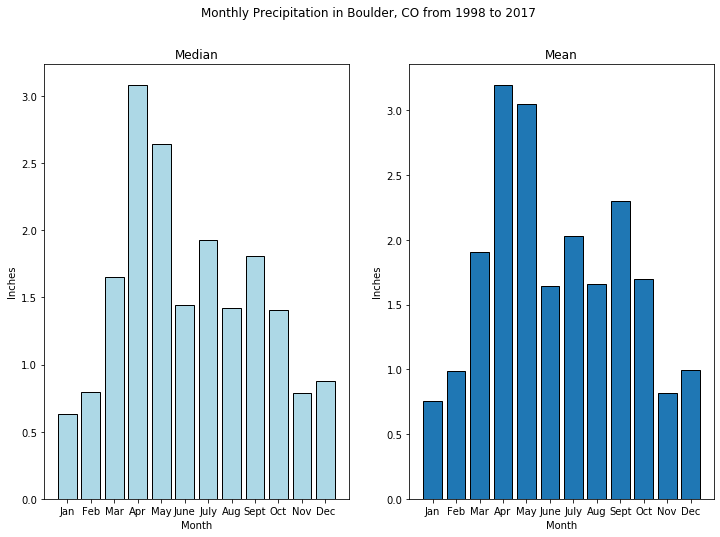

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))

fig.suptitle("Monthly Precipitation in Boulder, CO from 1998 to 2017")
# Show and set variables for plot on left
ax1.bar(months, precip_median, color="lightblue", edgecolor="black")
ax1.set(title="Median",
       xlabel="Month",
       ylabel="Inches")

# Do the same for other plot
ax2.bar(months, precip_mean_month, edgecolor="black")
ax2.set(title="Mean",
       xlabel="Month",
       ylabel="Inches")

### DO NOT REMOVE LINE BELOW ###
ts_1_plot = nb.convert_axes(plt, which_axes="all")

## Explain Your Plot

In the Markdown cell below, answer the following questions about your plot using any kind of Markdown list.

1. Which month has a notable difference between the median and mean values of the precipitation data? 
    * Thinking about the difference between how <a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/numpy-arrays/run-calculations-summary-statistics-numpy-arrays/#calculate-mean-and-median" target="_blank">means and medians are calculated</a>, what could be the cause of the difference between these two values in that particular month?

2. The plot instructions ask you to create two individual plots for the mean and median of the average precipitation values for each month. 
    * How else could this data be presented in a way that would allow for clearer comparison between the two datasets? 
    * What have you not learned yet in this course that would help you present the data differently?

Remove any existing text in the cell before adding your answer.

1. Sept. has a significant difference between median and mean precipitation values. The precipitation data for Septembers might not be evenly distributed. It may contain outliers which influence the mean more than the median. 
2. This data could be presented in a single chart to facilitate comparison. To keep the 2 series visually distinct,  one series could be shown as a line and the other series shown as a bar.
 - This would require multiple data series shown on a single plot - I've heard these referred to as "3-axis plots" but have not learned how to show them on a single plot using python.

## Discuss Your Workflow

In the Markdown cell below, answer the following questions using any kind of Markdown list.

1. This notebook asks you to summarize the arrays first, before running the calculation to convert the precipitation values from millimeters to inches. 
    * In what situations might this order beneficial to your workflow?
    * In what situations might you want to change the order of these steps (i.e. convert first)? 

2. You already had the months.txt file from a previous assignment. 
    * Thinking about reproducibility and collaboration, why do you think this notebook asks you to include the code to download it?  

3. Explain how checking the shape of each of these arrays helps you to understand how the data were summarized in that array:
    * mean of the precipitation values for each year (i.e. across all months in each year).
    * mean of the precipitation values for each month (i.e. across all years of data).

Remove any existing text in the cell before adding your answer.

1. In this excercise we're mainly concerned with displaying the data rather than using values in detailed calculations, so converting the data to different units does not need to be the first step. In fact, converting shorter arrays (after the mean and median are calculated) is more efficient than doing so on the original arrays. If processing time were a concern (like as a web backend or if we had way more data) this method is best. However, if we were doing a more detailed analysis or a comparison across datasets we would want consistent units and so would probably do the calculation as a first step.
2. We can't assume that a collaborator has the same data already downloaded. Adding this step ensures that all collaborators have the downloaded data at the same location and can more easily run this notebook. Plus, the data isn't re-downloaded using earthpy unless the parameter "replace=True" is set.
3. I can never remember which axis 0 or 1 is referring to in these parameter settings. Checking the shape allows me to verfy that I chose the correct axis value. For the mean of each year I would expect 20 values, 1 for each year. For the mean of each month I would expect 12 values, 1 for each month.

In [14]:
"""This line is a first step
to determine if there was 
a relationship between mean-median 
and the standard deviation. Sep had
the largest stdev"""
precip.std(axis=0)

array([12.11145939, 19.87768688, 32.04796623, 45.79965134, 43.69820865,
       25.34933998, 36.29634893, 30.97191002, 95.05867793, 23.04933143,
       12.20551272, 17.95869365])